<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

# Notes

* If P > t is close to 1 it means theres nearly no correlation.
* Jarque-Berra tells us whether we have problems with highlevels of colinearity.
* Smallest eigenvalue tells us that there is at least one dimension that is highly redundant.
* Removing outliers improves precision of our estimates.
* Highly colinear variables are usually also highly correlated.
* Coef says that an an additional x increases y by whatever that percent is in statsmodels
* Problem with ommited variables cause the price of a home to jump a lot.
* R 2 is the percetage of y that's explained by our x variables.
* 

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%config InlineBackend.figure_format='retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
##### Your Code Here #####

df_not_cleaned = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df['ln_price'] = np.log(df['SalePrice'])
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
df.drop(df.select_dtypes('object'),axis=1,inplace=True)
df.drop('LotFrontage',axis=1,inplace=True)
df.dropna(inplace=True, axis=0)
df.shape, df_not_cleaned.shape

((1452, 38), (1460, 81))

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'ln_price'],
      dtype='object')

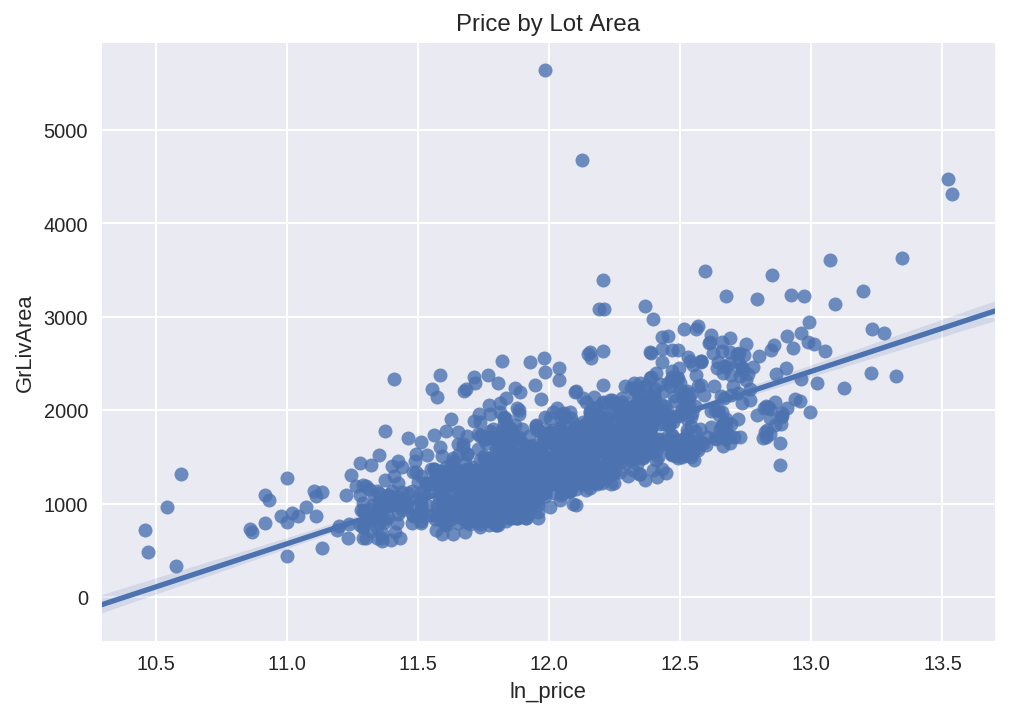

In [5]:
sns.regplot(df['ln_price'], df['GrLivArea']).set_title('Price by Lot Area');

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [6]:
##### Your Code Here #####
X = df.iloc[:,1:-2]
y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

def regression_statsmodel(y,X):
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  print(model.summary())
  
regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     282.0
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:                 741.73
No. Observations:                1452   AIC:                            -1415.
Df Residuals:                    1418   BIC:                            -1236.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.7630      5.988      2.799

**P-values > 0.05: MoSold
MiscVal
3SsnPorch
OpenPorchSF
GarageArea
MasVnrArea
BsmtFinSF2
GarageYrBlt
BedroomAbvGr
HalfBath
BsmtUnfSF
2ndFlrSF
LowQualFinSF
BsmtHalfBath**

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

A p-values of < 0.05 indicates that the predictor is likely to be a meaningful addition to the model because changes in the predictor's value are related to changed in the response variable.

To see if we should discard these variables, we would have to test for linear relationships with the dependent variable (price).

Except for MoSold, the p-values are higher as coefficients approach 0.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [7]:
# Drop large p-values, they're not meaningful to our model
outliers = ["MoSold", 'MiscVal', '3SsnPorch', 'OpenPorchSF', 'GarageArea', 
     'MasVnrArea', 'BsmtFinSF2', 'GarageYrBlt', 'BedroomAbvGr',
     'HalfBath', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 
     'BsmtHalfBath']
# df.drop(outliers, axis=1, inplace=True)
# df.drop('1stFlrSF',axis=1,inplace=True)

# Drop rows that with outliers 5 or more stadard deviations from mean
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df.shape

(1363, 38)

In [8]:
X = df.iloc[:,1:-2]
y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     386.1
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:                 950.45
No. Observations:                1363   AIC:                            -1835.
Df Residuals:                    1330   BIC:                            -1663.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9781      5.141      2.524

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

Already did above

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') 




/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[2421776.867492819,
 1.6006775360415122,
 1.4670695286295496,
 3.3037084392882092,
 1.5734302637123416,
 6.118651787967197,
 2.3861017381056753,
 1.4036840092619909,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 2.2023563532759654,
 1.1656871900068713,
 2.9426942270382703,
 2.2303588718900866,
 2.350638464016354,
 1.5986427254031828,
 4.8201260803957835,
 1.5486736072135043,
 4.957661747031753,
 5.616903361180215,
 5.590946980831386,
 1.225871360422096,
 1.2191912166493417,
 1.2673992161857215,
 1.0343260371085403,
 1.100347347088594,
 nan,
 1.037833921095826,
 1.0579695333183632,
 1.0539320059160622]

A few of the VIFs are ingfinity

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [95]:
df[outliers].cov()

,MoSold,MiscVal,3SsnPorch,OpenPorchSF,GarageArea,MasVnrArea,BsmtFinSF2,GarageYrBlt,BedroomAbvGr,HalfBath,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath
MoSold,7.222030,0.842446,0.562390,11.176174,21.223767,5.397956,1.635898,0.700530,0.159036,0.006673,52.683537,60.153091,1.688042,0.022070
MiscVal,0.842446,24288.363037,-11.211819,-306.428221,-848.193014,-686.192532,-273.525237,-107.776030,1.725078,-4.455754,-2857.568881,-912.498115,45.801998,0.171368
3SsnPorch,0.562390,-11.211819,64.156193,4.517631,-11.108366,-37.121222,-17.990914,-7.234260,-0.119053,0.021799,9.452700,-19.441417,14.297041,0.043863
OpenPorchSF,11.176174,-306.428221,4.517631,3658.729074,3169.133457,1443.676138,-333.287517,354.996834,3.539035,6.424272,3432.470841,4963.734377,2.586345,-0.175235
GarageArea,21.223767,-848.193014,-11.108366,3169.133457,44476.943273,13275.319728,-575.290149,3324.397383,13.695592,14.903271,18049.243162,11275.968441,-223.748818,-1.526361
MasVnrArea,5.397956,-686.192532,-37.121222,1443.676138,13275.319728,26325.195617,-1366.086212,1159.415928,14.498936,16.258989,9561.056398,10079.454577,-99.446535,0.291337
BsmtFinSF2,1.635898,-273.525237,-17.990914,-333.287517,-575.290149,-1366.086212,15852.391687,-223.601349,-0.164977,-3.998932,-10724.039731,-5387.356974,-36.779062,3.702502
GarageYrBlt,0.700530,-107.776030,-7.234260,354.996834,3324.397383,1159.415928,-223.601349,687.504299,-1.034042,2.543083,2210.138458,744.000285,-28.847806,-0.415321
BedroomAbvGr,0.159036,1.725078,-0.119053,3.539035,13.695592,14.498936,-0.164977,-1.034042,0.627406,0.097652,54.339574,165.819328,-0.292191,0.008481
HalfBath,0.006673,-4.455754,0.021799,6.424272,14.903271,16.258989,-3.998932,2.543083,0.097652,0.249392,-8.766459,133.041676,-0.099771,-0.002512


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# Stanard errors do impoove.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [97]:
def regression_statsmodel(y,X):
  model = sm.OLS(y, X).fit(cov_type='HC3')
  predictions = model.predict(X) 
  print(model.summary())
  
regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 5.045e+05
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:47:06   Log-Likelihood:                 950.45
No. Observations:                1363   AIC:                            -1835.
Df Residuals:                    1330   BIC:                            -1663.
Df Model:                          32                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9781      5.298      2.450

They go down slightly...

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

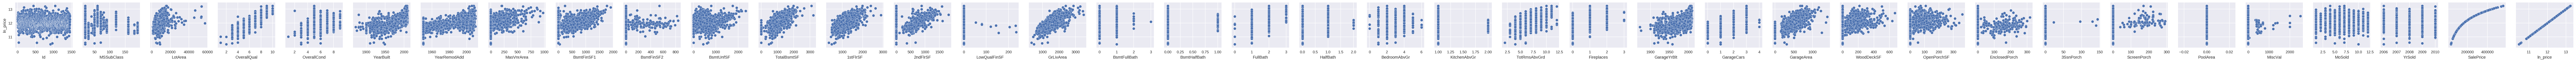

In [10]:
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=df.columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
##### Your Code Here #####

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####